In [ ]:
using Plots
import Distributions; dst = Distributions
import DataStructures

struct Lattice
    memory::DataStructures.OrderedDict{Tuple, Int8}
    neib::Tuple
end

function Lattice(lattice::Lattice, key::Tuple, value)
    lattice.memory[key] = value
end

function Lattice(lattice::Lattice, key::Tuple)
    if ~haskey(lattice.memory, key)
        lattice.memory[key] = 1
    end
    return lattice.memory[key]
end

function Lattice()
    return Lattice(DataStructures.OrderedDict{Tuple, Int8}((0,0,0)=>0), (
        ( 1, 0, 0), 
        ( 0, 1, 0), 
        ( 0, 0, 1), 
        (-1, 0, 0), 
        ( 0,-1, 0), 
        ( 0, 0,-1)))
end

function len(lattice::Lattice)
    return length(lattice.memory)
end

function Ω(x; a=1, b=1)
    """
    # Отображаем lattice_weigths в weigths используя параметры a и b
    0 => a
    2 => 1
    3:7 => b
    """
    if x == 0
        return a
    elseif x == 2
        return 1
    else
        return b
    end
end    

function InitSim()
    lattice = Lattice()
    pos = (0,0,0)
    Lattice(lattice, pos, 0)
    for neib in lattice.neib
        Lattice(lattice, pos .+ neib, Lattice(lattice, pos .+ neib) + 1)
    end
    lattice_weigths = [Lattice(lattice, pos .+ neib) for neib in lattice.neib]
    weigths = Ω.(lattice_weigths; a=4, b=2)
    probs = weigths ./ sum(weigths)
    return lattice, probs, pos
end

function Update!(lattice, probs, pos, aa, bb)
    step = lattice.neib[rand(dst.Categorical(probs))]
    if Lattice(lattice, pos .+ step) == 0
        pos = pos .+ step
        lattice_weigths = [Lattice(lattice, pos .+ neib) for neib in lattice.neib]
        weigths = Ω.(lattice_weigths; a=aa, b=bb)
        probs = weigths ./ sum(weigths)
    else
        pos = pos .+ step
        Lattice(lattice, pos, 0)
        for neib in lattice.neib
            if Lattice(lattice, pos .+ neib) != 0
                Lattice(lattice, pos .+ neib, Lattice(lattice, pos .+ neib) + 1)
            end
        end
        lattice_weigths = [Lattice(lattice, pos .+ neib) for neib in lattice.neib]
        weigths = Ω.(lattice_weigths; a=aa, b=bb)
        probs = weigths ./ sum(weigths)    
    end
    return probs, pos
end

aa = exp(-3)
bb = exp(-20)
lattice, probs, pos = InitSim()
len_lattice = len(lattice)
count = 0

time_array = []
start_time = time()
len_lattice = len(lattice)
while len(lattice) < 10000000
    global probs
    global pos
    global len_lattice
    probs, pos = Update!(lattice, probs, pos, aa, bb)
    if len(lattice) > len_lattice 
        len_lattice = len(lattice)
        temp_time = time()
        if rand()<0.01
            println(len_lattice, "  --> ", (temp_time-start_time))
        end
        push!(time_array, temp_time-start_time)
    end 
end

298  --> 0.20607495307922363
610  --> 0.2913999557495117
830  --> 0.5501949787139893
1307  --> 0.6622679233551025
1759  --> 0.8049149513244629
1992  --> 0.8674728870391846
2154  --> 0.924170970916748
2172  --> 0.9311537742614746
2499  --> 1.0517067909240723
2557  --> 1.0926918983459473
2885  --> 1.2445697784423828
2999  --> 1.2789678573608398
3427  --> 1.4014019966125488
3449  --> 1.411949872970581
3513  --> 1.4292879104614258
3725  --> 1.5157749652862549
4864  --> 1.9457998275756836
5471  --> 2.126865863800049
5732  --> 2.1911888122558594
5788  --> 2.2013638019561768
6482  --> 2.5164449214935303
6742  --> 2.6012868881225586
6871  --> 2.6430158615112305
7405  --> 2.9008448123931885
7646  --> 3.0105948448181152
8009  --> 3.117313861846924
8314  --> 3.228221893310547
8363  --> 3.256201982498169
9016  --> 3.547531843185425
9037  --> 3.5556728839874268
9211  --> 3.634164810180664
9423  --> 3.7421000003814697
10306  --> 4.351518869400024
10684  --> 4.692915916442871
11327  --> 4.89657688140

87994  --> 52.56882381439209
88295  --> 52.683337926864624
88872  --> 53.08751177787781
89312  --> 53.26219987869263
89413  --> 53.312198877334595
89416  --> 53.315969944000244
89627  --> 53.76296281814575
89637  --> 53.765381813049316
89891  --> 53.891658782958984
90213  --> 54.09903287887573
90645  --> 54.882566928863525
90733  --> 54.972399950027466
90757  --> 54.984107971191406
91153  --> 55.5131778717041
91824  --> 56.059584856033325
92284  --> 56.3181848526001
92622  --> 56.57674479484558
92984  --> 56.898698806762695
93192  --> 57.09085178375244
93245  --> 57.1316077709198
93368  --> 57.48092293739319
93516  --> 57.868687868118286
93576  --> 57.925068855285645
93850  --> 58.32617497444153
94235  --> 58.491949796676636
94586  --> 58.682363986968994
94601  --> 58.69671583175659
94839  --> 58.996840953826904
96303  --> 60.57429385185242
96468  --> 61.2383508682251
96873  --> 61.503084897994995
97534  --> 62.07129096984863
97569  --> 62.07818579673767
98206  --> 62.848843812942505
9

159903  --> 103.45374488830566
160144  --> 103.62733793258667
160307  --> 103.75779390335083
161101  --> 104.60549592971802
161127  --> 104.61727976799011
161183  --> 104.65884900093079
161960  --> 105.19541788101196
162347  --> 105.51359176635742
162420  --> 105.61265397071838
162695  --> 105.744619846344
163504  --> 106.17363977432251
163565  --> 106.19680500030518
163596  --> 106.20710897445679
163864  --> 106.34335899353027
164576  --> 106.62076377868652
164777  --> 106.75962090492249
164886  --> 106.81756281852722
165270  --> 107.11733984947205
166055  --> 107.97647500038147
166156  --> 108.06010484695435
166631  --> 108.38879299163818
166724  --> 108.44457483291626
166866  --> 108.60849976539612
166932  --> 108.69483995437622
167144  --> 108.81880497932434
167546  --> 109.06684279441833
167866  --> 109.2493188381195
167909  --> 109.26917791366577
168545  --> 109.56968188285828
168687  --> 109.66323900222778
168705  --> 109.67320489883423
168734  --> 109.70119881629944
168854  -->

236416  --> 163.06616282463074
236417  --> 163.07168889045715
237447  --> 163.6901819705963
237783  --> 164.03493094444275
237942  --> 164.09585285186768
238285  --> 164.21408081054688
238333  --> 164.23124480247498
238373  --> 164.24706983566284
238885  --> 164.4700198173523
239853  --> 165.03953194618225
239879  --> 165.04585599899292
239972  --> 165.1062729358673
240305  --> 165.24689078330994
240478  --> 165.36563777923584
241213  --> 166.21880388259888
241433  --> 166.32849287986755
241739  --> 166.5191798210144
241773  --> 166.52357482910156
241887  --> 166.55409383773804
242159  --> 166.65125799179077
242272  --> 166.66730999946594
242516  --> 166.7591278553009
242579  --> 166.8171489238739
242614  --> 166.82750391960144
243050  --> 167.0098888874054
243256  --> 167.13243699073792
243276  --> 167.16327476501465
243283  --> 167.1638879776001
243585  --> 167.24214696884155
244201  --> 167.5035858154297
244830  --> 167.86527180671692
244855  --> 167.90435695648193
245062  --> 168.0

311255  --> 227.92981696128845
311999  --> 228.4206418991089
312009  --> 228.4294228553772
312267  --> 229.17795395851135
312735  --> 229.99350786209106
312868  --> 230.297278881073
313471  --> 232.55850791931152
313770  --> 233.28078699111938
313832  --> 233.35566687583923
313879  --> 233.55302381515503
314205  --> 233.79154181480408
314438  --> 233.9337968826294
314636  --> 233.99554896354675
314912  --> 234.15051579475403
314972  --> 234.20603489875793
315082  --> 234.2964107990265
315088  --> 234.3002188205719
315358  --> 234.548113822937
315802  --> 234.93879985809326
315840  --> 234.95088577270508
316362  --> 235.2605128288269
316416  --> 235.30192494392395
316544  --> 235.40096879005432
316915  --> 235.91526079177856
317004  --> 235.9717447757721
317836  --> 236.95198488235474
317890  --> 236.97226977348328
317896  --> 236.97476387023926
318207  --> 237.24208998680115
318279  --> 237.3052179813385
318691  --> 237.5784559249878
319171  --> 237.79217386245728
319762  --> 238.07873

389399  --> 295.8331968784332
389718  --> 295.9878089427948
390284  --> 296.7246367931366
390343  --> 296.7752869129181
391410  --> 297.4110188484192
392787  --> 298.57544898986816
393387  --> 298.82437777519226
393817  --> 299.26909589767456
393907  --> 299.3403117656708
394131  --> 299.4947588443756
394203  --> 299.532595872879
394517  --> 300.01807594299316
394550  --> 300.10191798210144
394841  --> 300.2587778568268
395149  --> 300.74804878234863
395300  --> 301.03871178627014
395345  --> 301.0613169670105
396028  --> 301.418331861496
396129  --> 301.4573857784271
396411  --> 301.62327790260315
396761  --> 301.7495639324188
397593  --> 302.155907869339
397683  --> 302.17464780807495
398100  --> 302.43820786476135
398381  --> 302.63488698005676
398820  --> 302.8672888278961
399192  --> 303.19585394859314
399320  --> 303.26116585731506
399533  --> 303.3916177749634
399800  --> 303.6106278896332
399845  --> 303.67604780197144
400305  --> 304.11003279685974
400564  --> 304.226715803146

466819  --> 380.44002890586853
467073  --> 380.6174569129944
467212  --> 381.08189487457275
468042  --> 381.5630269050598
468727  --> 382.03393387794495
469579  --> 384.34694480895996
469641  --> 384.47667479515076
470074  --> 384.77767395973206
470212  --> 384.8176739215851
470632  --> 385.05752396583557
471244  --> 385.4693298339844
471313  --> 385.48400497436523
471724  --> 385.7484757900238
471821  --> 385.77073979377747
472481  --> 386.2233648300171
472521  --> 386.2383198738098
472946  --> 386.49482679367065
472960  --> 386.497713804245
473022  --> 386.5199418067932
473102  --> 386.53451895713806
473167  --> 386.5516939163208
473518  --> 386.71095085144043
474010  --> 386.88055992126465
474430  --> 387.07428193092346
474633  --> 387.1906638145447
474998  --> 387.343279838562
475482  --> 387.7371518611908
475902  --> 388.731321811676
476524  --> 389.1045198440552
476771  --> 389.22898387908936
476963  --> 389.38003396987915
477546  --> 389.7807607650757
478043  --> 390.05178189277

537362  --> 441.3871259689331
537829  --> 441.8052408695221
537863  --> 441.81892800331116
538257  --> 442.0253789424896
538287  --> 442.0345079898834
538747  --> 442.7012867927551
538875  --> 442.7725269794464
539236  --> 443.00125098228455
539381  --> 443.0890100002289
540096  --> 443.5940568447113
540149  --> 443.6068079471588
540370  --> 443.7194128036499
540458  --> 443.7984597682953
540582  --> 443.90528988838196
540806  --> 444.0209789276123
541166  --> 444.6282320022583
541288  --> 444.7453098297119
541367  --> 444.81449580192566
541521  --> 444.8961877822876
541882  --> 445.1111869812012
542251  --> 445.3401298522949
543103  --> 446.435742855072
543363  --> 446.7308988571167
543463  --> 446.7495708465576
543644  --> 446.84887886047363
543670  --> 446.85334277153015
543976  --> 447.1879999637604
544263  --> 447.4255259037018
544524  --> 447.8467938899994
544930  --> 448.097580909729
545232  --> 448.4391198158264
546104  --> 449.98942399024963
546446  --> 450.47924399375916
5464

613251  --> 506.65902280807495
613553  --> 506.98973178863525
613901  --> 507.5052738189697
614043  --> 507.84003376960754
614823  --> 508.7321708202362
615072  --> 508.97411584854126
615379  --> 509.26483488082886
615417  --> 509.32236099243164
615541  --> 509.4795038700104
615621  --> 509.5272099971771
615958  --> 509.635862827301
617702  --> 511.17687487602234
618062  --> 511.3332459926605
618367  --> 511.4838798046112
618692  --> 511.98983883857727
618794  --> 512.0899949073792
618977  --> 512.3984577655792
619033  --> 512.4651889801025
619344  --> 512.7251918315887
619681  --> 513.1861939430237
619892  --> 513.7474629878998
620088  --> 513.9997179508209
620142  --> 514.0167248249054
620624  --> 514.5580217838287
620683  --> 514.6258578300476
621049  --> 514.9506368637085
621220  --> 515.1798288822174
622268  --> 516.1525239944458
622295  --> 516.1722278594971
622597  --> 516.285285949707
622975  --> 516.7674088478088
623713  --> 517.9142959117889
624110  --> 518.5158979892731
6241

696106  --> 588.1012258529663
696131  --> 588.1109929084778
696249  --> 588.2288448810577
696265  --> 588.23415184021
696467  --> 588.36470079422
696634  --> 588.5235178470612
696766  --> 588.5845658779144
696894  --> 588.6481878757477
697128  --> 588.777471780777
697211  --> 588.7988829612732
697909  --> 589.1647539138794
697970  --> 589.1791758537292
698157  --> 589.2538249492645
698179  --> 589.2899799346924
698349  --> 589.3470458984375
699058  --> 589.9722929000854
699090  --> 589.9866619110107
699577  --> 590.2863597869873
699910  --> 590.4658648967743
699927  --> 590.469456911087
700660  --> 590.7134289741516
701677  --> 591.5640289783478
703190  --> 592.2632329463959
703510  --> 592.4434089660645
704995  --> 593.3405828475952
705046  --> 593.3692669868469
705357  --> 593.5046219825745
705626  --> 593.7048408985138
705724  --> 593.8062288761139
705833  --> 593.8586368560791
705841  --> 593.8631119728088
706148  --> 594.0849628448486
706320  --> 594.1697340011597
706375  --> 594.

774396  --> 641.9680857658386
774574  --> 642.1059718132019
775028  --> 642.4266028404236
775192  --> 642.5385558605194
775240  --> 642.5747628211975
775364  --> 642.8185369968414
775463  --> 642.8917269706726
775515  --> 643.0293378829956
775779  --> 643.3820798397064
775856  --> 643.4377439022064
775870  --> 643.4892158508301
776073  --> 643.5703959465027
776416  --> 643.8615498542786
776480  --> 643.8836407661438
776643  --> 643.9981789588928
777130  --> 644.2844769954681
777685  --> 644.5056419372559
777736  --> 644.5605628490448
777830  --> 644.6378648281097
777947  --> 644.7047889232635
777998  --> 644.7151529788971
778259  --> 644.8136467933655
778443  --> 645.0334289073944
778631  --> 645.1330718994141
778697  --> 645.2674219608307
778702  --> 645.2680299282074
779266  --> 645.7834768295288
779502  --> 646.2456498146057
779657  --> 646.346156835556
779785  --> 646.4079308509827
780149  --> 646.6419348716736
780799  --> 647.0407519340515
781128  --> 647.4805428981781
781909  -->

852894  --> 699.8790187835693
853084  --> 699.940153837204
853733  --> 700.2653198242188
853903  --> 700.3593218326569
855053  --> 700.9665579795837
855735  --> 701.4574258327484
856752  --> 702.0161468982697
856957  --> 702.1452739238739
857103  --> 702.2449018955231
857408  --> 702.3980407714844
857614  --> 702.5533139705658
857679  --> 702.6197807788849
857688  --> 702.6268329620361
857950  --> 702.788468837738
858022  --> 702.8724479675293
858735  --> 703.3573749065399
858905  --> 703.3973848819733
859201  --> 703.5838198661804
859287  --> 703.6000897884369
859465  --> 703.6679339408875
859788  --> 703.8429608345032
859832  --> 703.9040329456329
860166  --> 704.2468838691711
860654  --> 704.5074789524078
860761  --> 704.5508568286896
860810  --> 704.6051909923553
861716  --> 705.0486009120941
861844  --> 705.0949499607086
862059  --> 705.277429819107
862826  --> 706.1005098819733
863238  --> 706.2826998233795
863523  --> 706.4498248100281
863932  --> 706.6339948177338
864152  --> 7

931752  --> 759.1761739253998
931852  --> 759.2417199611664
931900  --> 759.2541899681091
932358  --> 759.4078018665314
932589  --> 759.5048069953918
932903  --> 759.884997844696
932923  --> 759.8932499885559
933099  --> 760.1207277774811
933132  --> 760.1462478637695
933379  --> 760.667564868927
933743  --> 761.32754778862
933793  --> 761.3461108207703
933801  --> 761.3472847938538
935409  --> 763.4289648532867
935725  --> 763.6684617996216
935889  --> 763.8531498908997
936170  --> 764.1920177936554
936203  --> 764.1995837688446
936569  --> 764.4759068489075
936653  --> 764.5910329818726
936997  --> 764.9808859825134
937436  --> 765.1537668704987
937530  --> 765.2033929824829
937932  --> 765.4565508365631
938049  --> 765.8956248760223
938109  --> 766.1897668838501
938385  --> 766.4374239444733
939120  --> 767.1656317710876
939452  --> 767.3374300003052
939481  --> 767.3425369262695
939553  --> 767.383306980133
939821  --> 767.464605808258
940080  --> 767.5787048339844
940209  --> 767.

1005601  --> 814.0419328212738
1006109  --> 814.6630928516388
1006352  --> 814.8086779117584
1006374  --> 814.8234119415283
1006576  --> 815.2645938396454
1006827  --> 815.8293569087982
1007008  --> 815.9080619812012
1007145  --> 816.3250918388367
1007173  --> 816.3329927921295
1007627  --> 816.9780299663544
1007815  --> 817.1856248378754
1007863  --> 817.2038488388062
1007870  --> 817.2061178684235
1007880  --> 817.2101187705994
1008118  --> 817.4147429466248
1008367  --> 817.5077149868011
1009730  --> 818.8609318733215
1010025  --> 819.0521287918091
1010060  --> 819.095853805542
1010349  --> 819.2933328151703
1010485  --> 819.4476568698883
1010742  --> 819.5625729560852
1010772  --> 819.5732309818268
1010899  --> 819.5975959300995
1011037  --> 819.6903688907623
1011079  --> 819.7213008403778
1011355  --> 819.7579028606415
1011545  --> 819.8334798812866
1011684  --> 819.8959248065948
1012321  --> 820.075642824173
1012447  --> 820.1249787807465
1012527  --> 820.1568489074707
1012692  -

1087050  --> 870.1557137966156
1087310  --> 870.288566827774
1087440  --> 870.3550977706909
1087568  --> 870.4307279586792
1087597  --> 870.4395818710327
1088147  --> 870.6757168769836
1088970  --> 871.2395977973938
1089127  --> 871.413685798645
1089258  --> 871.5754849910736
1089462  --> 871.7117488384247
1090011  --> 871.9990158081055
1090076  --> 872.0273218154907
1090379  --> 872.1984038352966
1090621  --> 872.3167488574982
1090795  --> 872.3599047660828
1091622  --> 872.6669068336487
1092268  --> 873.1142818927765
1092531  --> 873.2873318195343
1092585  --> 873.3526668548584
1092786  --> 873.4974889755249
1093050  --> 873.6411998271942
1094239  --> 874.3005239963531
1094345  --> 874.3809309005737
1094612  --> 874.5283827781677
1094622  --> 874.5311148166656
1095113  --> 874.7435159683228
1095365  --> 874.9029769897461
1095451  --> 874.9141008853912
1095748  --> 875.033665895462
1096287  --> 875.3895699977875
1096403  --> 875.405758857727
1096473  --> 875.4340260028839
1096530  -->

1167109  --> 917.0394659042358
1167168  --> 917.1079018115997
1167318  --> 917.2065918445587
1167563  --> 917.3486738204956
1167736  --> 917.5034999847412
1168005  --> 917.6914498806
1168876  --> 918.2389187812805
1169640  --> 919.0582327842712
1169895  --> 919.1778779029846
1170671  --> 919.4910328388214
1170698  --> 919.4940598011017
1170790  --> 919.554976940155
1171134  --> 919.6527798175812
1171211  --> 919.6963248252869
1171766  --> 920.0763549804688
1172055  --> 920.1760637760162
1172473  --> 920.6260349750519
1172645  --> 920.7384099960327
1172990  --> 920.9595530033112
1173524  --> 921.5280318260193
1173955  --> 921.9644658565521
1174227  --> 922.1435418128967
1174930  --> 922.5802688598633
1175199  --> 922.818657875061
1175281  --> 922.8477098941803
1175376  --> 922.8944737911224
1175693  --> 923.2395448684692
1175859  --> 923.3478989601135
1176183  --> 923.579185962677
1176891  --> 923.8897039890289
1177235  --> 924.0894989967346
1177456  --> 924.2121939659119
1177811  --> 9

1246232  --> 976.7339508533478
1248758  --> 978.9193367958069
1249036  --> 979.1065759658813
1249231  --> 979.208958864212
1249399  --> 979.343672990799
1249574  --> 979.4246628284454
1250073  --> 979.7332179546356
1250113  --> 979.7543179988861
1250341  --> 980.101658821106
1250470  --> 980.2030589580536
1250620  --> 980.2800648212433
1251032  --> 980.4321599006653
1251142  --> 980.5012898445129
1251537  --> 980.6492068767548
1251930  --> 981.0654609203339
1252086  --> 981.6106967926025
1252260  --> 981.7680199146271
1252449  --> 981.9061768054962
1252596  --> 981.9759819507599
1253133  --> 982.3482229709625
1254427  --> 983.2784099578857
1254460  --> 983.2890207767487
1254976  --> 983.8162019252777
1255305  --> 984.0613489151001
1255813  --> 984.3605349063873
1256408  --> 984.7325179576874
1256546  --> 984.8194818496704
1256681  --> 984.8832559585571
1256881  --> 985.0956377983093
1256979  --> 985.1356739997864
1256984  --> 985.137699842453
1257296  --> 985.3255598545074
1257962  -->

1328864  --> 1050.9985737800598
1328870  --> 1051.0003697872162
1329090  --> 1051.0854988098145
1329679  --> 1051.2950038909912
1329745  --> 1051.3272378444672
1329846  --> 1051.338206768036
1330072  --> 1051.3724398612976
1330506  --> 1051.5487020015717
1330583  --> 1051.5608887672424
1330750  --> 1051.6255309581757
1331101  --> 1051.822987794876
1331722  --> 1052.3184769153595
1331757  --> 1052.3379299640656
1331962  --> 1052.502121925354
1332000  --> 1052.5128347873688
1332066  --> 1052.5842888355255
1332238  --> 1052.6596188545227
1333140  --> 1053.1625299453735
1333364  --> 1053.3034958839417
1333601  --> 1053.4207577705383
1334529  --> 1054.0303008556366
1334546  --> 1054.080906867981
1334668  --> 1054.1169238090515
1335588  --> 1054.715901851654
1335684  --> 1054.778384923935
1335734  --> 1054.810388803482
1336133  --> 1055.1952719688416
1336433  --> 1055.3365697860718
1336436  --> 1055.3372910022736
1336713  --> 1055.4897727966309
1336774  --> 1055.5131239891052
1336997  --> 10

1404601  --> 1108.087350845337
1404986  --> 1108.2331819534302
1405699  --> 1108.4823698997498
1406339  --> 1108.6803669929504
1407313  --> 1109.0134139060974
1407431  --> 1109.0814139842987
1407545  --> 1109.1507959365845
1407732  --> 1109.2226898670197
1407961  --> 1109.3122749328613
1408062  --> 1109.35666680336
1408448  --> 1109.5487928390503
1408812  --> 1109.7093069553375
1409285  --> 1110.01926279068
1409397  --> 1110.0969808101654
1409414  --> 1110.1258718967438
1409452  --> 1110.1494579315186
1409951  --> 1110.3209249973297
1410374  --> 1110.4591038227081
1410748  --> 1110.6350338459015
1411143  --> 1110.789361000061
1411423  --> 1110.908900976181
1411862  --> 1111.020887851715
1412019  --> 1111.0745668411255
1412554  --> 1111.2444078922272
1412598  --> 1111.2846338748932
1413782  --> 1111.6481549739838
1413903  --> 1111.6993668079376
1414096  --> 1111.7761669158936
1414098  --> 1111.7856957912445
1414813  --> 1112.0785298347473
1414891  --> 1112.1023659706116
1415186  --> 111

1478561  --> 1159.2350399494171
1478630  --> 1159.286849975586
1478754  --> 1159.3644058704376
1478831  --> 1159.377240896225
1479694  --> 1159.752572774887
1479760  --> 1159.7840259075165
1480638  --> 1160.3021907806396
1481121  --> 1160.5076339244843
1481439  --> 1160.6925778388977
1481679  --> 1160.8357009887695
1481904  --> 1161.0885968208313
1482092  --> 1161.1864597797394
1482504  --> 1161.4212608337402
1482646  --> 1161.482924938202
1483199  --> 1161.70236992836
1483378  --> 1161.8099219799042
1483716  --> 1162.2119748592377
1483756  --> 1162.2172420024872
1484059  --> 1162.4764308929443
1484089  --> 1162.4786388874054
1484123  --> 1162.5144448280334
1484457  --> 1162.6997067928314
1484604  --> 1162.78093791008
1484606  --> 1162.7825229167938
1484621  --> 1162.7871448993683
1485218  --> 1163.1797959804535
1485297  --> 1163.277983903885
1485599  --> 1163.6428837776184
1485673  --> 1163.6850018501282
1485947  --> 1163.8988049030304
1486515  --> 1164.1774399280548
1487711  --> 1164

1554857  --> 1218.61670088768
1555421  --> 1219.300262928009
1555495  --> 1219.4632349014282
1555552  --> 1219.6458549499512
1555561  --> 1219.655643939972
1555807  --> 1220.4125339984894
1556629  --> 1220.7926449775696
1556651  --> 1220.803760766983
1556818  --> 1220.9410779476166
1556826  --> 1220.9425067901611
1556879  --> 1220.9570198059082
1557645  --> 1221.496533870697
1557758  --> 1221.6574578285217
1557880  --> 1221.7539567947388
1557947  --> 1221.8368079662323
1558050  --> 1221.9269938468933
1558226  --> 1222.096263885498
1558486  --> 1222.4089679718018
1558549  --> 1222.4234418869019
1558608  --> 1222.43820977211
1559074  --> 1222.7530889511108
1559084  --> 1222.754849910736
1559658  --> 1223.201751947403
1559702  --> 1223.2082228660583
1559710  --> 1223.2155048847198
1559802  --> 1223.3029549121857
1559979  --> 1223.38405585289
1560067  --> 1223.4775648117065
1560106  --> 1223.5567708015442
1560313  --> 1223.576891899109
1560354  --> 1223.6244609355927
1560611  --> 1223.7190

1625310  --> 1283.012043952942
1625832  --> 1283.327821969986
1625866  --> 1283.3641607761383
1626893  --> 1283.974030971527
1627104  --> 1284.0634877681732
1627627  --> 1284.5233178138733
1627775  --> 1284.832002878189
1627917  --> 1284.876951932907
1627920  --> 1284.8771297931671
1628533  --> 1285.2288057804108
1628692  --> 1285.3091278076172
1628786  --> 1285.3625168800354
1629911  --> 1285.9957358837128
1630530  --> 1286.330190896988
1630545  --> 1286.3346538543701
1631134  --> 1286.7701888084412
1631229  --> 1286.9407908916473
1631937  --> 1287.445016860962
1632088  --> 1287.6234757900238
1632884  --> 1288.766040802002
1633116  --> 1288.9440038204193
1633417  --> 1289.0724799633026
1633420  --> 1289.0728979110718
1633468  --> 1289.0840559005737
1633810  --> 1289.264711856842
1634527  --> 1290.156487941742
1635096  --> 1290.4163517951965
1635293  --> 1290.5118789672852
1635463  --> 1290.5899858474731
1635539  --> 1290.7349309921265
1636036  --> 1291.6764769554138
1636543  --> 1292.

1701962  --> 1346.1913888454437
1701999  --> 1346.1972608566284
1702042  --> 1346.2840538024902
1702349  --> 1346.4416317939758
1702664  --> 1346.6154148578644
1702700  --> 1346.6332819461823
1703640  --> 1347.3273239135742
1703844  --> 1347.4874529838562
1704229  --> 1347.7772607803345
1704295  --> 1347.8323998451233
1704829  --> 1348.0500898361206
1706058  --> 1349.3930008411407
1706916  --> 1349.8441519737244
1707133  --> 1349.9242949485779
1707186  --> 1349.930772781372
1707312  --> 1349.9424538612366
1707351  --> 1349.9544739723206
1708239  --> 1350.2797808647156
1709070  --> 1350.6963279247284
1709083  --> 1350.7022919654846
1709290  --> 1350.802269935608
1709398  --> 1350.8694927692413
1709456  --> 1350.8765108585358
1709573  --> 1350.912838935852
1709780  --> 1350.9831228256226
1710003  --> 1351.1320309638977
1710045  --> 1351.1445758342743
1710053  --> 1351.1473639011383
1710488  --> 1351.3442299365997
1711366  --> 1352.0228118896484
1711489  --> 1352.115182876587
1711982  -->

1776797  --> 1395.2490599155426
1776829  --> 1395.256957769394
1777068  --> 1395.3711049556732
1777119  --> 1395.4214458465576
1777185  --> 1395.4464218616486
1777599  --> 1395.6053738594055
1777682  --> 1395.6309599876404
1777838  --> 1395.6809339523315
1778011  --> 1395.7672119140625
1778267  --> 1395.8170928955078
1778423  --> 1395.9429287910461
1778653  --> 1396.0639338493347
1779546  --> 1396.7615418434143
1779678  --> 1396.8477458953857
1779697  --> 1396.8502278327942
1779808  --> 1396.9425609111786
1779824  --> 1396.9852788448334
1780611  --> 1397.767827987671
1780678  --> 1397.7823278903961
1781063  --> 1398.473480939865
1781350  --> 1398.8113148212433
1781973  --> 1399.5380599498749
1782065  --> 1399.6158838272095
1782153  --> 1399.68776679039
1782752  --> 1400.0362248420715
1783025  --> 1400.1202039718628
1783316  --> 1400.3901898860931
1783447  --> 1400.5952279567719
1783540  --> 1400.820021867752
1783616  --> 1400.8523919582367
1783917  --> 1401.4625339508057
1783984  --> 1

1849904  --> 1440.360435962677
1850120  --> 1440.472955942154
1850602  --> 1440.7865688800812
1850845  --> 1441.0382618904114
1850881  --> 1441.046071767807
1851019  --> 1441.137524843216
1851556  --> 1441.52969789505
1851590  --> 1441.5515899658203
1851855  --> 1441.7941069602966
1852157  --> 1442.0189468860626
1853280  --> 1443.4403908252716
1853292  --> 1443.4449849128723
1853912  --> 1443.8888437747955
1854556  --> 1444.8661258220673
1854663  --> 1445.0467598438263
1854927  --> 1445.3909349441528
1855328  --> 1445.7886719703674
1855383  --> 1445.7999148368835
1855432  --> 1445.81813788414
1855714  --> 1446.1247339248657
1855885  --> 1446.3131928443909
1856893  --> 1446.8871049880981
1857772  --> 1447.6226909160614
1858284  --> 1447.905152797699
1858467  --> 1447.9860048294067
1858883  --> 1448.1401557922363
1859388  --> 1448.5424439907074
1859483  --> 1448.6525428295135
1859740  --> 1448.8255949020386
1859815  --> 1448.8945558071136
1860176  --> 1449.1449389457703
1860418  --> 1449

1922362  --> 1502.0049209594727
1922606  --> 1502.1003618240356
1922650  --> 1502.1092638969421
1922665  --> 1502.1109638214111
1922901  --> 1502.192352771759
1923010  --> 1502.2099118232727
1923299  --> 1502.344976902008
1923335  --> 1502.3616847991943
1923490  --> 1502.384293794632
1923554  --> 1502.4454789161682
1923594  --> 1502.4628899097443
1923637  --> 1502.5041167736053
1924886  --> 1503.3029639720917
1925053  --> 1503.3814778327942
1925319  --> 1503.5259997844696
1925517  --> 1503.5990839004517
1925523  --> 1503.6036548614502
1925759  --> 1503.786849975586
1925854  --> 1503.8562669754028
1925985  --> 1503.887079000473
1926593  --> 1504.296145915985
1926740  --> 1504.370267868042
1926855  --> 1504.4469528198242
1927099  --> 1504.528720855713
1927212  --> 1504.612634897232
1927631  --> 1504.890445947647
1927650  --> 1504.9476549625397
1927736  --> 1505.0279848575592
1927790  --> 1505.055683851242
1928009  --> 1505.3057658672333
1928067  --> 1505.3831009864807
1928739  --> 1505.8

1987077  --> 1552.4324798583984
1987125  --> 1552.4586918354034
1987672  --> 1553.0994548797607
1988215  --> 1553.5015239715576
1988288  --> 1553.5247359275818
1988527  --> 1553.6155099868774
1988703  --> 1553.6978368759155
1988716  --> 1553.6998069286346
1988902  --> 1553.846463918686
1989150  --> 1553.9442257881165
1989188  --> 1553.9500048160553
1989322  --> 1553.9715538024902
1990620  --> 1554.6662487983704
1990825  --> 1554.7328968048096
1991200  --> 1554.8500378131866
1991208  --> 1554.8506028652191
1991959  --> 1555.4463658332825
1992276  --> 1555.6256029605865
1992373  --> 1555.6424469947815
1992482  --> 1555.6962728500366
1992585  --> 1555.7128059864044
1992823  --> 1555.8218548297882
1993101  --> 1556.2264258861542
1993268  --> 1556.32878780365
1993286  --> 1556.3351209163666
1993999  --> 1556.9155268669128
1994773  --> 1557.6298298835754
1994889  --> 1557.6603848934174
1994891  --> 1557.6615068912506
1995160  --> 1557.8064668178558
1995270  --> 1557.8308629989624
1995356  --

2076497  --> 1635.983414888382
2076504  --> 1635.983768939972
2076809  --> 1636.1053857803345
2077170  --> 1636.3273057937622
2077631  --> 1636.5307919979095
2077680  --> 1636.5483648777008
2078129  --> 1636.7840728759766
2079220  --> 1637.4101798534393
2079418  --> 1637.5604479312897
2079643  --> 1637.6701509952545
2079664  --> 1637.7010118961334
2080246  --> 1638.2239589691162
2080714  --> 1638.482251882553
2080828  --> 1638.636605978012
2080993  --> 1638.7131249904633
2081237  --> 1638.8063368797302
2082117  --> 1639.521313905716
2082458  --> 1639.7151069641113
2082644  --> 1639.98317694664
2082715  --> 1640.0724928379059
2082760  --> 1640.1497747898102
2082893  --> 1640.233479976654
2082988  --> 1640.264872789383
2083458  --> 1640.9474008083344
2083944  --> 1641.5566048622131
2084197  --> 1641.8224639892578
2084241  --> 1641.8300437927246
2084735  --> 1642.436453819275
2084746  --> 1642.437963962555
2085097  --> 1642.546618938446
2085151  --> 1642.5616149902344
2085503  --> 1642.72

2156318  --> 1696.5888068675995
2157047  --> 1697.207983970642
2157160  --> 1697.305184841156
2157353  --> 1697.3895618915558
2157842  --> 1697.9154388904572
2157851  --> 1697.9541099071503
2158003  --> 1697.9809398651123
2158551  --> 1698.2536067962646
2158841  --> 1698.52920794487
2159629  --> 1699.198532819748
2160036  --> 1699.4597239494324
2160779  --> 1699.8841669559479
2161301  --> 1700.068363904953
2161414  --> 1700.156465768814
2161557  --> 1700.313785791397
2162358  --> 1700.8531959056854
2162559  --> 1701.0123348236084
2162724  --> 1701.056736946106
2162924  --> 1701.1458368301392
2163611  --> 1701.73716878891
2163617  --> 1701.7448689937592
2163818  --> 1701.8359937667847
2164345  --> 1702.2457358837128
2164601  --> 1702.366777896881
2164634  --> 1702.4478948116302
2164738  --> 1702.6264507770538
2164791  --> 1702.6725709438324
2165930  --> 1703.3716878890991
2166384  --> 1703.7157027721405
2167184  --> 1704.0828249454498
2167190  --> 1704.0833778381348
2167361  --> 1704.17

2230375  --> 1759.0287289619446
2230729  --> 1759.179699897766
2231132  --> 1759.3687999248505
2231547  --> 1759.6117057800293
2232252  --> 1759.9494199752808
2233097  --> 1760.4180388450623
2233142  --> 1760.471757888794
2233331  --> 1760.6380808353424
2233513  --> 1760.6629469394684
2233579  --> 1760.6703119277954
2233895  --> 1760.8097219467163
2233972  --> 1760.8520159721375
2234578  --> 1761.5396678447723
2234615  --> 1761.6108379364014
2235088  --> 1761.983622789383
2236165  --> 1762.6490309238434
2236908  --> 1763.2156829833984
2237092  --> 1763.2972707748413
2237344  --> 1763.3724749088287
2237693  --> 1763.5368008613586
2238015  --> 1763.6991357803345
2238207  --> 1763.8009707927704
2238442  --> 1763.9620988368988
2238588  --> 1764.0840799808502
2239511  --> 1764.9346389770508
2239615  --> 1764.9495198726654
2240314  --> 1765.3700177669525
2240464  --> 1765.3989617824554
2240551  --> 1765.4488348960876
2240635  --> 1765.4680140018463
2241563  --> 1765.972823858261
2241597  -->

2301825  --> 1812.9536697864532
2302344  --> 1813.1865458488464
2303240  --> 1813.7131278514862
2303360  --> 1813.7458138465881
2303437  --> 1813.7582409381866
2303681  --> 1813.9168219566345
2304010  --> 1814.0130298137665
2304447  --> 1814.2427377700806
2304496  --> 1814.248771905899
2304731  --> 1814.4088189601898
2304890  --> 1814.4356248378754
2305057  --> 1814.5019857883453
2305417  --> 1814.630803823471
2305578  --> 1814.722223997116
2305663  --> 1814.8046338558197
2306270  --> 1815.141233921051
2306564  --> 1815.2238519191742
2306618  --> 1815.2849929332733
2306741  --> 1815.3153100013733
2307158  --> 1815.5608048439026
2307572  --> 1815.8320879936218
2307711  --> 1815.9854028224945
2307871  --> 1816.0721759796143
2308296  --> 1816.25981092453
2308546  --> 1816.5197978019714
2308562  --> 1816.5215439796448
2309603  --> 1816.977383852005
2309814  --> 1817.1437499523163
2309933  --> 1817.2124469280243
2310134  --> 1817.309042930603
2310234  --> 1817.339844942093
2311179  --> 1817

2374404  --> 1872.7168028354645
2374580  --> 1872.9038817882538
2374805  --> 1873.079431772232
2374814  --> 1873.0804779529572
2375519  --> 1873.7502508163452
2376461  --> 1874.9079568386078
2376750  --> 1875.3019337654114
2377537  --> 1876.2905278205872
2377833  --> 1876.5201778411865
2378242  --> 1876.7236387729645
2378400  --> 1876.8539688587189
2378595  --> 1877.0256989002228
2378648  --> 1877.0453629493713
2378722  --> 1877.1222999095917
2380369  --> 1878.2509939670563
2380466  --> 1878.3515839576721
2380925  --> 1878.6219758987427
2381023  --> 1878.6886508464813
2381304  --> 1878.894229888916
2381503  --> 1879.1437327861786
2381752  --> 1879.4214489459991
2382269  --> 1879.734407901764
2382360  --> 1879.7587418556213
2382657  --> 1879.892366886139
2382759  --> 1879.916268825531
2382775  --> 1879.917876958847
2383311  --> 1880.252769947052
2383379  --> 1880.2811858654022
2383605  --> 1880.3788368701935
2383884  --> 1880.5510268211365
2384179  --> 1880.7134449481964
2385136  --> 18

2452260  --> 1939.1462688446045
2452585  --> 1939.263564825058
2452731  --> 1939.3416018486023
2452866  --> 1939.8839569091797
2452970  --> 1940.1349167823792
2453007  --> 1940.2886588573456
2453585  --> 1942.7487428188324
2454021  --> 1944.004133939743
2454410  --> 1944.2545728683472
2454435  --> 1944.2586379051208
2454506  --> 1944.2719929218292
2455397  --> 1944.7746019363403
2455582  --> 1945.0219688415527
2455707  --> 1945.5677018165588
2455771  --> 1945.585373878479
2456143  --> 1947.0508069992065
2456678  --> 1947.9988358020782
2458438  --> 1950.9296488761902
2458454  --> 1950.9755339622498
2458763  --> 1951.4497108459473
2459111  --> 1952.3173937797546
2459392  --> 1952.5668368339539
2459552  --> 1952.603141784668
2459593  --> 1952.646854877472
2459736  --> 1952.6840879917145
2460161  --> 1953.1935458183289
2460226  --> 1953.2906308174133
2460500  --> 1953.4793348312378
2460535  --> 1953.485013961792
2460804  --> 1953.6145889759064
2461023  --> 1953.644830942154
2461050  --> 19

2529718  --> 2015.8388378620148
2529930  --> 2016.1345767974854
2530093  --> 2016.4482328891754
2530438  --> 2016.6561419963837
2531228  --> 2018.1983358860016
2531391  --> 2019.0522758960724
2531533  --> 2019.3398559093475
2531780  --> 2020.248421907425
2531921  --> 2020.5939419269562
2531959  --> 2020.6162519454956
2532022  --> 2020.8103318214417
2532104  --> 2020.948217868805
2532127  --> 2020.9516048431396
2532243  --> 2021.0742027759552
2532547  --> 2022.0246648788452
2532776  --> 2022.4146208763123
2532936  --> 2022.5387349128723
2533507  --> 2023.2248439788818
2533581  --> 2023.4646389484406
2533970  --> 2024.1533958911896
2534163  --> 2024.8395838737488
2534165  --> 2024.8537719249725
2534627  --> 2025.9903137683868
2534681  --> 2026.0438058376312
2534830  --> 2026.1353359222412
2535042  --> 2026.304738998413
2535123  --> 2026.3396229743958
2536176  --> 2027.5412409305573
2536196  --> 2027.5487978458405
2536581  --> 2027.7952008247375
2536790  --> 2027.9825239181519
2536795  --

2605673  --> 2120.1005408763885
2605734  --> 2120.164790868759
2605784  --> 2120.1738498210907
2605851  --> 2120.1848859786987
2606097  --> 2120.2773339748383
2606221  --> 2120.2930278778076
2606546  --> 2120.4314699172974
2606973  --> 2120.5440089702606
2607603  --> 2120.8867337703705
2607923  --> 2120.990643978119
2608289  --> 2121.2291388511658
2608522  --> 2121.390968799591
2608791  --> 2121.702568769455
2609696  --> 2122.3160059452057
2609796  --> 2122.555179834366
2609942  --> 2122.633527994156
2610059  --> 2122.651953935623
2611021  --> 2123.3557538986206
2611726  --> 2123.6089029312134
2612444  --> 2124.0586969852448
2612500  --> 2124.1332149505615
2613270  --> 2124.579036951065
2613604  --> 2124.7624979019165
2613631  --> 2124.768269777298
2613817  --> 2124.932009935379
2613933  --> 2125.0356488227844
2613973  --> 2125.111082792282
2614022  --> 2125.1954669952393
2614212  --> 2125.6110808849335
2614409  --> 2125.9036309719086
2614492  --> 2125.9177827835083
2615151  --> 2126.2

2684696  --> 2197.2443659305573
2684923  --> 2197.436274766922
2685310  --> 2197.7854969501495
2685820  --> 2198.6806378364563
2685888  --> 2198.841780900955
2685930  --> 2198.8547468185425
2686056  --> 2198.9956588745117
2686112  --> 2199.0328159332275
2686542  --> 2200.88538479805
2686967  --> 2203.1286499500275
2687051  --> 2203.2064418792725
2687298  --> 2203.3690659999847
2687769  --> 2204.295735836029
2687828  --> 2204.3623628616333
2688302  --> 2204.7917869091034
2688453  --> 2205.010061979294
2688820  --> 2206.391024827957
2689001  --> 2207.223027944565
2689004  --> 2207.224893808365
2689121  --> 2208.5197467803955
2689363  --> 2208.645346879959
2690147  --> 2209.6782479286194
2690215  --> 2209.692409992218
2690332  --> 2209.765295982361
2690552  --> 2209.943717956543
2690733  --> 2210.056496858597
2690898  --> 2210.14848780632
2691388  --> 2210.4690539836884
2691411  --> 2210.490439891815
2692603  --> 2211.112662792206
2693034  --> 2211.626182794571
2693080  --> 2211.639420986

2756398  --> 2287.39244890213
2756452  --> 2287.5015139579773
2756562  --> 2287.66584277153
2756657  --> 2287.7331478595734
2756806  --> 2287.837606906891
2756859  --> 2287.84290099144
2757054  --> 2289.771169900894
2757099  --> 2290.223785877228
2757197  --> 2290.42680478096
2757460  --> 2291.200519800186
2757715  --> 2291.4970989227295
2757861  --> 2291.58282995224
2758269  --> 2291.895320892334
2758401  --> 2291.930547952652
2758500  --> 2292.0000059604645
2758724  --> 2292.5390779972076
2759478  --> 2295.199840784073
2759622  --> 2295.542205810547
2759757  --> 2295.5687489509583
2759870  --> 2295.642707824707
2760275  --> 2295.8341348171234
2760357  --> 2295.901113986969
2760567  --> 2296.009963989258
2760782  --> 2296.176456928253
2760883  --> 2296.266142845154
2761203  --> 2296.6048588752747
2761854  --> 2297.2981419563293
2761965  --> 2297.3386459350586
2762429  --> 2297.757602930069
2762463  --> 2297.820785999298
2762692  --> 2297.943968772888
2762785  --> 2298.0184938907623
27

2830577  --> 2357.9874107837677
2830803  --> 2358.0821487903595
2830851  --> 2358.1036648750305
2831254  --> 2358.371409893036
2831392  --> 2358.4851999282837
2832292  --> 2359.0148928165436
2832337  --> 2359.111184835434
2832528  --> 2359.2511949539185
2832599  --> 2359.31316280365
2832864  --> 2359.4440047740936
2832948  --> 2359.600708961487
2832982  --> 2359.6111738681793
2833156  --> 2359.706328868866
2833398  --> 2359.915627002716
2833748  --> 2360.2713029384613
2834046  --> 2360.4677999019623
2834420  --> 2360.696473836899
2834902  --> 2360.878651857376
2835137  --> 2360.975739955902
2835172  --> 2360.9826459884644
2835363  --> 2361.0696358680725
2835630  --> 2361.274689912796
2835899  --> 2361.6194689273834
2835924  --> 2361.625207901001
2836517  --> 2361.8530819416046
2836573  --> 2361.909083843231
2836709  --> 2361.9430978298187
2836969  --> 2362.1993408203125
2837283  --> 2362.5211379528046
2837635  --> 2362.9950819015503
2837735  --> 2363.102926969528
2838255  --> 2363.2711

2905111  --> 2418.1518638134003
2905793  --> 2419.33239197731
2905863  --> 2419.38688993454
2906007  --> 2419.4243788719177
2906056  --> 2419.4908499717712
2906145  --> 2419.5224888324738
2906197  --> 2419.5961718559265
2906487  --> 2420.382337808609
2906501  --> 2420.4465708732605
2907065  --> 2421.6086299419403
2907112  --> 2421.633058786392
2907252  --> 2421.813900947571
2907300  --> 2421.9170088768005
2907478  --> 2422.1233699321747
2907488  --> 2422.1236758232117
2907745  --> 2422.5853037834167
2908193  --> 2423.2022359371185
2908244  --> 2423.253520965576
2908254  --> 2423.2688689231873
2908276  --> 2423.2975738048553
2908326  --> 2423.3492379188538
2908380  --> 2423.383923768997
2908784  --> 2423.652965784073
2908952  --> 2423.764054775238
2909240  --> 2424.126657962799
2909353  --> 2424.1595389842987
2909769  --> 2424.34267783165
2909828  --> 2424.3474798202515
2910319  --> 2424.6010417938232
2910575  --> 2424.7952609062195
2910669  --> 2424.90763092041
2911542  --> 2425.602041

2981346  --> 2487.0190148353577
2981676  --> 2487.16388297081
2982050  --> 2487.4305617809296
2982553  --> 2487.654506921768
2983357  --> 2488.313220977783
2983369  --> 2488.313674926758
2983719  --> 2488.5460698604584
2983785  --> 2488.721932888031
2983867  --> 2488.7976269721985
2984235  --> 2489.09188079834
2984491  --> 2489.293229818344
2984859  --> 2489.6206138134003
2984870  --> 2489.6225938796997
2985451  --> 2490.0979738235474
2985579  --> 2490.1917748451233
2985714  --> 2490.240000963211
2985770  --> 2490.3235759735107
2986616  --> 2490.8898479938507
2986693  --> 2490.9083478450775
2987074  --> 2491.1376719474792
2987380  --> 2491.388940811157
2987666  --> 2491.533012866974
2987871  --> 2491.6142687797546
2988036  --> 2491.718586921692
2988118  --> 2491.736603975296
2988831  --> 2492.1116449832916
2988860  --> 2492.11886882782
2989387  --> 2492.489457845688
2990284  --> 2492.9237987995148
2990341  --> 2493.0155589580536
2992283  --> 2494.426507949829
2992350  --> 2494.43330883

3055382  --> 2568.69349193573
3055520  --> 2568.7411918640137
3055580  --> 2568.8420248031616
3055907  --> 2569.030595779419
3055992  --> 2569.0950779914856
3056045  --> 2569.126507997513
3056176  --> 2569.2050969600677
3056745  --> 2569.723096847534
3056768  --> 2569.7270658016205
3056877  --> 2569.8251259326935
3056950  --> 2569.9986288547516
3056966  --> 2570.01366686821
3057261  --> 2570.1390459537506
3057457  --> 2570.3387649059296
3057623  --> 2570.630846977234
3058445  --> 2571.326588869095
3058660  --> 2571.4159898757935
3059661  --> 2571.908367872238
3059796  --> 2572.0030949115753
3059912  --> 2572.0232858657837
3060767  --> 2572.550568819046
3060942  --> 2572.654701948166
3061149  --> 2572.755956888199
3061738  --> 2573.2429599761963
3061891  --> 2573.349668979645
3062140  --> 2573.5011298656464
3062161  --> 2573.504008769989
3062174  --> 2573.5064868927
3062206  --> 2573.507619857788
3062292  --> 2573.5332748889923
3062384  --> 2573.5506098270416
3062492  --> 2573.635474920

3143019  --> 2643.699474811554
3143054  --> 2643.706592798233
3143356  --> 2643.9964389801025
3143486  --> 2644.0821437835693
3143615  --> 2644.2026369571686
3143932  --> 2644.2928178310394
3144307  --> 2644.4311878681183
3144316  --> 2644.4316058158875
3144319  --> 2644.431711912155
3144446  --> 2644.501214981079
3145504  --> 2644.985088825226
3146042  --> 2645.290603876114
3146390  --> 2645.4915750026703
3146954  --> 2645.829680919647
3147303  --> 2646.0862028598785
3147413  --> 2646.125382900238
3147862  --> 2646.4078998565674
3148203  --> 2646.6220819950104
3148465  --> 2646.7945239543915
3149305  --> 2647.301204919815
3149543  --> 2647.4334189891815
3149706  --> 2647.50346493721
3149892  --> 2647.582424879074
3150125  --> 2647.799831867218
3151193  --> 2648.629648923874
3151665  --> 2648.9243779182434
3151995  --> 2649.1126029491425
3152216  --> 2649.2125477790833
3152329  --> 2649.2885739803314
3152823  --> 2649.5904138088226
3152893  --> 2649.6082928180695
3152974  --> 2649.6270

3218655  --> 2693.0179059505463
3219191  --> 2693.192003965378
3219484  --> 2693.2876420021057
3219677  --> 2693.3844408988953
3219954  --> 2693.517482995987
3220077  --> 2693.588565826416
3220181  --> 2693.621085882187
3220345  --> 2693.708699941635
3220399  --> 2693.722465991974
3220759  --> 2693.917829990387
3220978  --> 2694.0849368572235
3221184  --> 2694.194965839386
3221476  --> 2694.391159772873
3222094  --> 2694.6061379909515
3222652  --> 2694.994709968567
3222946  --> 2695.187451839447
3223006  --> 2695.223624944687
3223410  --> 2695.4839899539948
3223703  --> 2695.779164791107
3224014  --> 2695.894625902176
3224076  --> 2696.000321865082
3224152  --> 2696.025055885315
3225078  --> 2696.7230467796326
3225195  --> 2696.828455924988
3225368  --> 2697.12380695343
3225384  --> 2697.1290287971497
3225612  --> 2697.305739879608
3225917  --> 2697.529930830002
3226355  --> 2698.00044298172
3226540  --> 2698.1078119277954
3226748  --> 2698.2896189689636
3227302  --> 2698.6100759506226

3295879  --> 2744.6984238624573
3296081  --> 2745.0059678554535
3296618  --> 2745.5815818309784
3297053  --> 2745.8725538253784
3297209  --> 2746.075907945633
3297272  --> 2746.089307785034
3297384  --> 2746.114310979843
3297606  --> 2746.397647857666
3297692  --> 2746.496566772461
3298086  --> 2747.286849975586
3298635  --> 2749.122423887253
3298761  --> 2749.2104699611664
3299018  --> 2749.4102478027344
3299075  --> 2749.6338319778442
3299089  --> 2749.6358058452606
3299239  --> 2749.8979408740997
3299675  --> 2750.207282781601
3299751  --> 2750.2877068519592
3299790  --> 2750.31179189682
3299862  --> 2750.3956809043884
3299895  --> 2750.512486934662
3300072  --> 2750.7270889282227
3300422  --> 2751.2891759872437
3300942  --> 2751.538239955902
3301249  --> 2751.7962458133698
3301455  --> 2752.0027527809143
3301558  --> 2752.035834789276
3302031  --> 2752.400958776474
3302065  --> 2752.4097259044647
3302221  --> 2752.5173919200897
3302351  --> 2752.6064908504486
3302678  --> 2752.7889

3369662  --> 2806.2752277851105
3371118  --> 2807.5760447978973
3371289  --> 2807.9764518737793
3371300  --> 2807.9781987667084
3372344  --> 2808.9848668575287
3372927  --> 2809.4787538051605
3372992  --> 2809.5404918193817
3373208  --> 2809.6597468852997
3373309  --> 2809.8555607795715
3373446  --> 2809.9535269737244
3373910  --> 2810.2554738521576
3374029  --> 2810.2761068344116
3374567  --> 2810.5526897907257
3374950  --> 2810.7668619155884
3375278  --> 2810.944701910019
3375579  --> 2811.14253282547
3375624  --> 2811.1717348098755
3375781  --> 2811.276610851288
3375828  --> 2811.2890768051147
3376164  --> 2811.4488978385925
3376229  --> 2811.473154783249
3376342  --> 2811.567629814148
3376365  --> 2811.5731048583984
3376439  --> 2811.5828828811646
3376623  --> 2811.7519447803497
3376986  --> 2812.170739889145
3377024  --> 2812.267273902893
3377026  --> 2812.279858827591
3377059  --> 2812.3753168582916
3377504  --> 2812.65300989151
3379313  --> 2813.634992837906
3380055  --> 2813.98

In [ ]:
using Plots
plot(time_array)

In [ ]:
[0 for i in keys(lattice.memory) if lattice.memory[i]==0]

In [ ]:
aa, bb

In [ ]:
import Pkg; Pkg.add("NPZ")
import Pkg; Pkg.add("ProgressMeter")

In [ ]:
using NPZ
res = hcat([[k for k in i] for i in keys(lattice.memory) if lattice.memory[i]==0]...)
npzwrite("a=3_b=2_visited_volume=20k.npy", res)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:28
┌ Info: Saved animation to 
│   fn = /home/jovyan/Reinforced Random Walk/tmp.gif
└ @ Plots /opt/julia/packages/Plots/12uaJ/src/animation.jl:98


Plots.AnimatedGif("/home/jovyan/Reinforced Random Walk/tmp.gif")
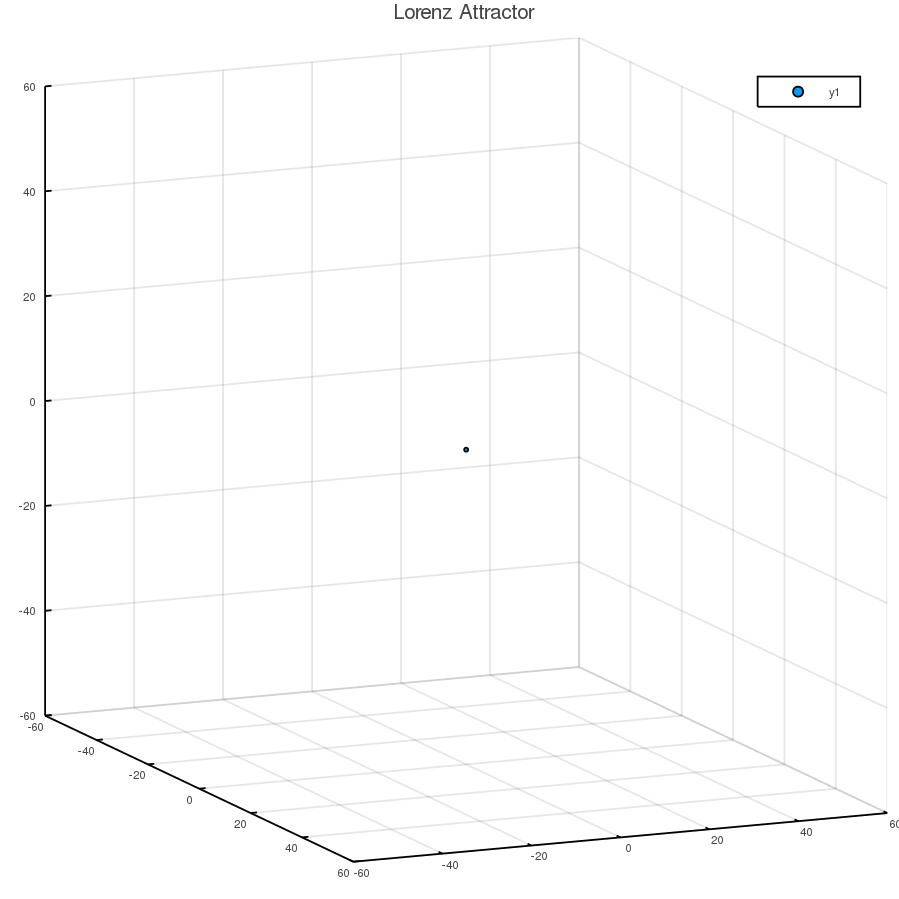

In [12]:
# initialize a 3D plot with 1 empty series
size_ = 60
default(size = (900, 900))
plt = scatter3d(1, xlim=(-size_,size_), ylim=(-size_,size_), zlim=(-size_,size_),
                title = "Lorenz Attractor", markersize = 3);
using ProgressMeter
prog = Progress(len(lattice),1)
i = 0
@gif for point in keys(lattice.memory)
    if lattice.memory[point] == 0
        push!(plt, point);
        scatter3d!(plt, xlim=(-size_,size_), ylim=(-size_,size_), zlim=(-size_,size_), 
            title = "Lorenz Attractor", 
            markersize = 3, 
            camera=(60, 30))
        global i += 1
    end
    next!(prog)
end every 100

In [14]:
import Pkg; Pkg.add("NearestNeighbors")
using NearestNeighbors

 Resolving package versions...
 Installed Distances ──────── v0.8.2
 Installed NearestNeighbors ─ v0.4.4
  Updating `/opt/julia/environments/v1.2/Project.toml`
  [b8a86587] + NearestNeighbors v0.4.4
  Updating `/opt/julia/environments/v1.2/Manifest.toml`
  [b4f34e82] + Distances v0.8.2
  [b8a86587] + NearestNeighbors v0.4.4


┌ Info: Precompiling NearestNeighbors [b8a86587-4115-5ab1-83bc-aa920d37bbce]
└ @ Base loading.jl:1242


In [15]:
res

3×20001 Array{Int64,2}:
 0  1  0  0  -1   0   0   1   0  -1   0  …   13   12   12   10   10   10  10
 0  0  1  0   0  -1   0   0   1   0  -1     -14  -14  -15  -14  -15  -10  -9
 0  0  0  1   0   0  -1  -1  -1  -1  -1       2    3    2    5    4    1   0

In [23]:
kdtree = KDTree(convert(Array{Float64,2}, res); leafsize = 10)

KDTree{StaticArrays.SArray{Tuple{3},Float64,1,3},Euclidean,Float64}
  Number of points: 20001
  Dimensions: 3
  Metric: Euclidean(0.0)
  Reordered: true

In [28]:
?kdtree

search: kdtree KDTree



No documentation found.

`kdtree` is of type `KDTree{StaticArrays.SArray{Tuple{3},Float64,1,3},Euclidean,Float64}`.

# Summary

```
struct KDTree{StaticArrays.SArray{Tuple{3},Float64,1,3},Euclidean,Float64} <: NNTree{StaticArrays.SArray{Tuple{3},Float64,1,3},Euclidean}
```

# Fields

```
data      :: Array{StaticArrays.SArray{Tuple{3},Float64,1,3},1}
hyper_rec :: NearestNeighbors.HyperRectangle{Float64}
indices   :: Array{Int64,1}
metric    :: Euclidean
nodes     :: Array{NearestNeighbors.KDNode{Float64},1}
tree_data :: NearestNeighbors.TreeData
reordered :: Bool
```

# Supertype Hierarchy

```
KDTree{StaticArrays.SArray{Tuple{3},Float64,1,3},Euclidean,Float64} <: NNTree{StaticArrays.SArray{Tuple{3},Float64,1,3},Euclidean} <: Any
```


### Some old gifs

Progress: 100%|█████████████████████████████████████████| Time: 0:10:05
┌ Info: Saved animation to 
│   fn = C:\Users\Alexander\tmp.gif
└ @ Plots C:\Users\Alexander\.julia\packages\Plots\AXUqs\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\Alexander\\tmp.gif")
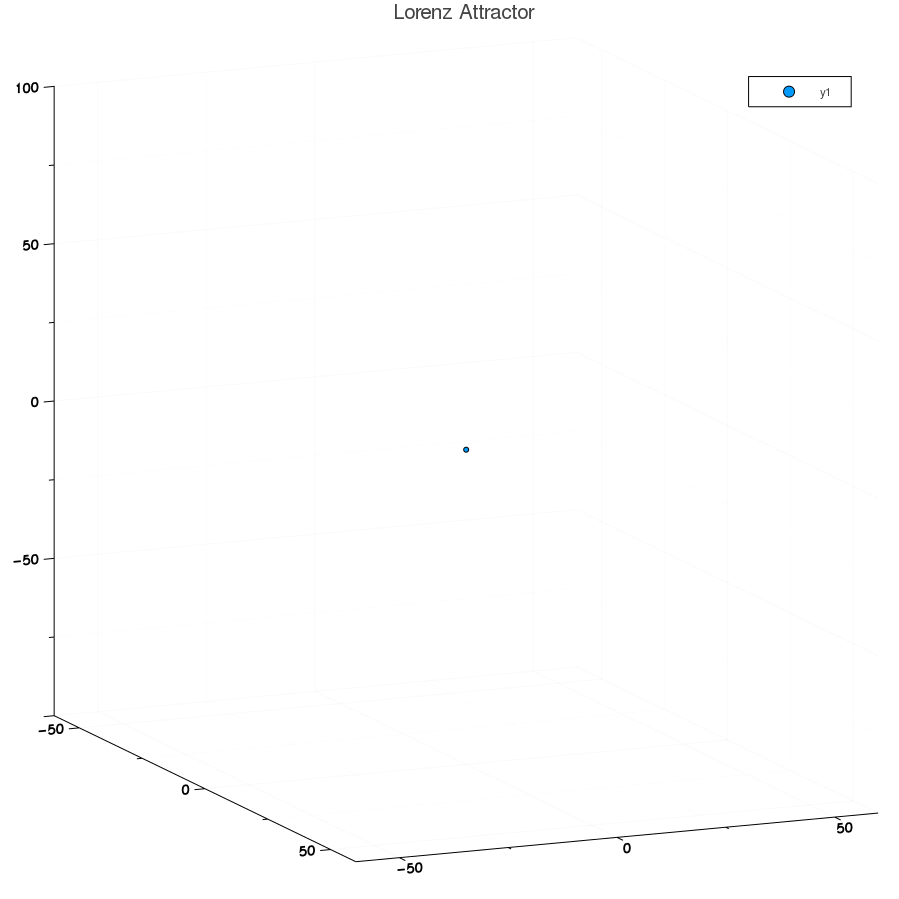

In [15]:
# initialize a 3D plot with 1 empty series
size_ = 60
default(size = (900, 900))
plt = scatter3d(1, xlim=(-size_,size_), ylim=(-size_,size_), zlim=(-size_,size_),
                title = "Lorenz Attractor", markersize = 3);
using ProgressMeter
prog = Progress(len(lattice),1)
i = 0
@gif for point in keys(lattice.memory)
    if lattice.memory[point] == 0
        push!(plt, point);
        scatter3d!(plt, xlim=(-size_,size_), ylim=(-size_,size_), zlim=(-size_,size_), 
            title = "Lorenz Attractor", 
            markersize = 3, 
            camera=(60, 30))
        global i += 1
    end
    next!(prog)
end every 100

# How the phase diagram will change in case of volume and surface reinforced random walk on random graphs?

<img src="Mode_ description_zoomed.png">

Дан граф G = (V_total, E_total). По вершинам графа движется агент. Пусть агент посетил множество вершин V и в данный момент времени находится в какой-нибудь вершине, для определенности назовем её v_current. С вершиной v_current связано множество вершин V_neib_current, в одну из которых в следующий момент может пойти агент.

In [20]:
Pkg.add("Zygote")

 Resolving package versions...
 Installed ZygoteRules ── v0.2.0
 Installed AbstractFFTs ─ v0.5.0
 Installed IRTools ────── v0.3.1
 Installed ArrayLayouts ─ v0.2.4
 Installed NNlib ──────── v0.6.6
 Installed Zygote ─────── v0.4.15
  Updating `/opt/julia/environments/v1.2/Project.toml`
  [e88e6eb3] + Zygote v0.4.15
  Updating `/opt/julia/environments/v1.2/Manifest.toml`
  [621f4979] + AbstractFFTs v0.5.0
  [4c555306] + ArrayLayouts v0.2.4
  [7869d1d1] + IRTools v0.3.1
  [872c559c] + NNlib v0.6.6
  [e88e6eb3] + Zygote v0.4.15
  [700de1a5] + ZygoteRules v0.2.0
  Building NNlib → `/opt/julia/packages/NNlib/FAI3o/deps/build.log`


In [21]:
using Zygote: @adjoint

┌ Info: Precompiling Zygote [e88e6eb3-aa80-5325-afca-941959d7151f]
└ @ Base loading.jl:1242


In [22]:
add(a, b) = a + b
@adjoint add(a, b) = add(a, b), Δ -> (Δ, Δ)

In [23]:
using Zygote

In [38]:
t(x) = 3*x^3 + 3

t (generic function with 1 method)

In [39]:
t'(6)

324

In [40]:
@code_llvm t'(6)


;  @ /opt/julia/packages/Zygote/4tJp5/src/compiler/interface.jl:48 within `#40'
define i64 @"julia_#40_20021"(i64) {
top:
; ┌ @ /opt/julia/packages/Zygote/4tJp5/src/compiler/interface.jl:45 within `gradient'
; │┌ @ /opt/julia/packages/Zygote/4tJp5/src/compiler/interface.jl:36 within `#38'
; ││┌ @ In[38]:1 within `t'
; │││┌ @ /opt/julia/packages/ZygoteRules/6nssF/src/adjoint.jl:49 within `#1792#back'
; ││││┌ @ /opt/julia/packages/Zygote/4tJp5/src/lib/number.jl:37 within `#674'
; │││││┌ @ intfuncs.jl:244 within `literal_pow'
; ││││││┌ @ int.jl:54 within `*'
         %1 = mul i64 %0, 9
; │││││└└
; │││││┌ @ int.jl:54 within `*'
        %2 = mul i64 %1, %0
; └└└└└└
  ret i64 %2
}
